# Programme for International Student Assessment
## by Mohamed AbdelGawad Ibrahim

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a
conventional school test. Rather than examining how well
students have learned the school curriculum, it looks at how
well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those
economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy.

> For simplicity, I extracted 8 columns that I am interested in, out of the original dataset, then saved this subset to local csv file.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# df = pd.read_csv("pisa2012.csv", usecols=['ST04Q01', 'ST15Q01', 'ST19Q01', 'ST28Q01', 'ST49Q01', 'ST35Q06', 'ST29Q04', 'OUTHOURS']).dropna()
# df.rename(columns={
#     'ST04Q01': 'gender', 
#     'ST15Q01': 'mom_job',
#     'ST19Q01' : 'dad_job',
#     'ST28Q01' : 'books_count',
#     'ST49Q01' : 'talk_math',
#     'OUTHOURS' : 'stdy_hrs',
#     'ST35Q06' : 'prnts_math',
#     'ST29Q04' : 'enjoy_math'
# }, inplace=True)
# df.to_csv("pisa2012_subset.csv", encoding='utf-8', index=False)

df = pd.read_csv("pisa2012_subset.csv")
cols_names = {
        'mother_job_status': 'mom_job', 
        'father_job_status': 'dad_job',
        'talk_maths_with_friends' : 'talk_math',
        'out-study-hours' : 'stdy_hrs',
        'parents_like_maths' : 'prnts_math',
        'enjoy_maths' : 'enjoy_math'
    }
df.rename(columns = cols_names, inplace = True)
df.head(10)

,gender,mom_job,dad_job,books_count,enjoy_math,prnts_math,talk_math,stdy_hrs
0,Female,Working full-time <for pay>,Working full-time <for pay>,201-500 books,Disagree,Agree,Sometimes,8.0
1,Female,Working full-time <for pay>,Working full-time <for pay>,More than 500 books,Agree,Agree,Sometimes,24.0
2,Female,Working full-time <for pay>,Working full-time <for pay>,0-10 books,Agree,Agree,Sometimes,18.0
3,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,0-10 books,Strongly disagree,Strongly agree,Sometimes,29.0
4,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,0-10 books,Agree,Agree,Sometimes,7.0
5,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,26-100 books,Agree,Agree,Often,36.0
6,Female,"Not working, but looking for a job",Working full-time <for pay>,11-25 books,Agree,Strongly agree,Sometimes,10.0
7,Male,"Other (e.g. home duties, retired)",Working full-time <for pay>,201-500 books,Agree,Strongly agree,Often,25.0
8,Female,"Other (e.g. home duties, retired)",Working part-time <for pay>,26-100 books,Strongly agree,Agree,Often,23.0
9,Male,Working full-time <for pay>,Working full-time <for pay>,11-25 books,Agree,Strongly agree,Sometimes,19.0


## Cleaning The DataFrame:

In [3]:
# Print column values
df.mom_job.unique()

array(['Working full-time <for pay> ',
       'Other (e.g. home duties, retired) ',
       'Not working, but looking for a job ',
       'Working part-time <for pay>'], dtype=object)

In [4]:
# Remap column values to simpler values
col_map = {
    'Working full-time <for pay> ' : 'full_time',
    'Other (e.g. home duties, retired) ' : 'other',
    'Not working, but looking for a job ' : 'searching',
    'Working part-time <for pay>' : 'part_time'
}
df['mom_job'] = df['mom_job'].map(col_map)
df.mom_job.unique()

array(['full_time', 'other', 'searching', 'part_time'], dtype=object)

In [5]:
# Print column values
df.dad_job.unique()

array(['Working full-time <for pay> ', 'Working part-time <for pay>',
       'Other (e.g. home duties, retired) ',
       'Not working, but looking for a job'], dtype=object)

In [6]:
# Remap column values to simpler values
col_map = {
    'Working full-time <for pay> ' : 'full_time',
    'Other (e.g. home duties, retired) ' : 'other',
    'Not working, but looking for a job' : 'searching',
   'Working part-time <for pay>' : 'part_time'
}
df['dad_job'] = df['dad_job'].map(col_map)
df.dad_job.unique()

array(['full_time', 'part_time', 'other', 'searching'], dtype=object)

In [7]:
# Print column values
df.books_count.unique()

array(['201-500 books ', 'More than 500 books', '0-10 books ',
       '26-100 books ', '11-25 books ', '101-200 books '], dtype=object)

In [8]:
# Remap column values to simpler values
col_map = {
    '201-500 books ' : '201-500',
    'More than 500 books' : '500+',
    '0-10 books ' : '0-10',
    '26-100 books ' : '26-100',
    '11-25 books ' : '11-25',
    '101-200 books ' : '101-200'
}
df['books_count'] = df['books_count'].map(col_map)
df.books_count.unique()

array(['201-500', '500+', '0-10', '26-100', '11-25', '101-200'],
      dtype=object)

In [9]:
# Print column values
df.talk_math.unique()

array(['Sometimes', 'Often', 'Always or almost always', 'Never or rarely'],
      dtype=object)

In [10]:
# Remap column values to simpler values
col_map = {
    'Always or almost always' : 'Always',
    'Never or rarely' : 'Never',
    'Sometimes' : 'Sometimes',
    'Often' : 'Often'
}
df['talk_math'] = df['talk_math'].map(col_map)
df.talk_math.unique()

array(['Sometimes', 'Often', 'Always', 'Never'], dtype=object)

In [11]:
df.head(10)

,gender,mom_job,dad_job,books_count,enjoy_math,prnts_math,talk_math,stdy_hrs
0,Female,full_time,full_time,201-500,Disagree,Agree,Sometimes,8.0
1,Female,full_time,full_time,500+,Agree,Agree,Sometimes,24.0
2,Female,full_time,full_time,0-10,Agree,Agree,Sometimes,18.0
3,Female,other,full_time,0-10,Strongly disagree,Strongly agree,Sometimes,29.0
4,Female,other,full_time,0-10,Agree,Agree,Sometimes,7.0
5,Female,other,full_time,26-100,Agree,Agree,Often,36.0
6,Female,searching,full_time,11-25,Agree,Strongly agree,Sometimes,10.0
7,Male,other,full_time,201-500,Agree,Strongly agree,Often,25.0
8,Female,other,part_time,26-100,Strongly agree,Agree,Often,23.0
9,Male,full_time,full_time,11-25,Agree,Strongly agree,Sometimes,19.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gender       138030 non-null  object 
 1   mom_job      138030 non-null  object 
 2   dad_job      138030 non-null  object 
 3   books_count  138030 non-null  object 
 4   enjoy_math   138030 non-null  object 
 5   prnts_math   138030 non-null  object 
 6   talk_math    138030 non-null  object 
 7   stdy_hrs     138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


### What is the structure of your dataset?

> There are 138,030 entries in the dataset with 11 features as follows: 
> * gender
> * mom_job : Mother Current Job Status
> * dad_job : Father Current Job Status
> * enjoy_math : Math Interest - Enjoy Maths
> * prnts_math : Subjective Norms - Parents Like Mathematics
> * books_count : How many books at home
> * talk_math : Math Behaviour - Talk about Maths with Friends
> * stdy_hrs : Out-of-School Study Time

> Most variables are categorical in nature, but the variables stdy_hrs, wealth, and pv1math are numerical variables.

### What is/are the main feature(s) of interest in your dataset?

> Math Interest - Enjoy Maths

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * prnts_math : Subjective Norms - Parents Like Mathematics
> * stdy_hrs : Out-of-School Study Time
> * talk_math : Math Behaviour - Talk about Maths with Friends

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

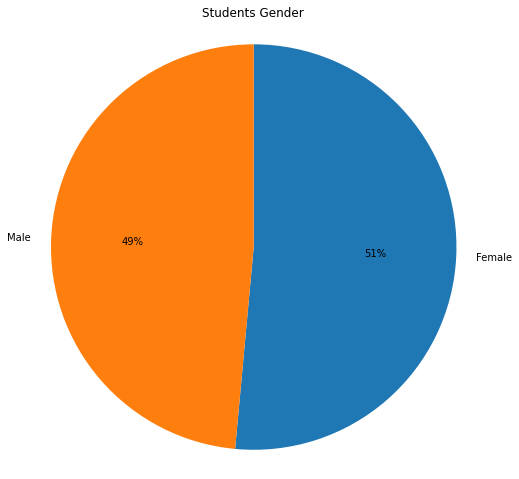

In [13]:
# How many males vs. females in the dataset
sorted_gender = df.gender.value_counts()
plt.figure(figsize=[ 11.69, 8.27])
plt.pie(sorted_gender, labels = sorted_gender.index, startangle = 90, counterclock = False, autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.1);
# We have the used option `Square`.
plt.title("Students Gender");
plt.axis('square');

> We've slightly more females than males in our dataset.

In [14]:
df.mom_job.unique()

array(['full_time', 'other', 'searching', 'part_time'], dtype=object)

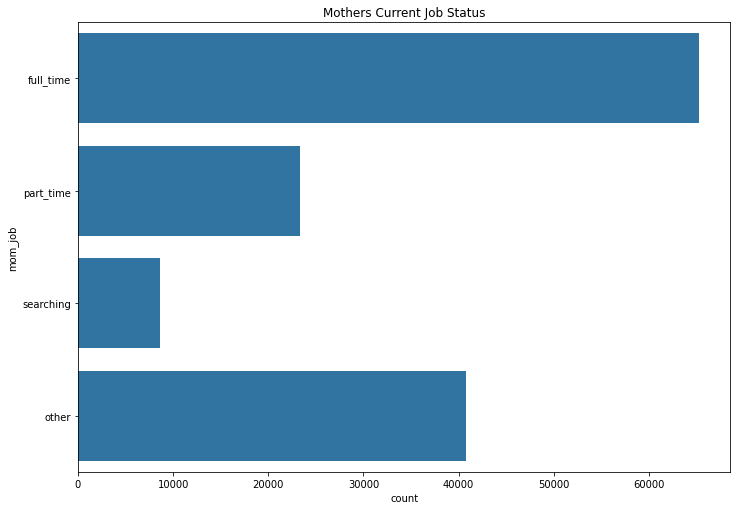

In [15]:
# Mother Current Job Status
base_color = sb.color_palette()[0]
working_order = [
    'full_time',
    'part_time',
    'searching',
    'other'
]
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'mom_job', color = base_color, order = working_order);
plt.title("Mothers Current Job Status");

> We can see that the majority of mothers are working full-time, and many mothers aren't working neither looking for a job.

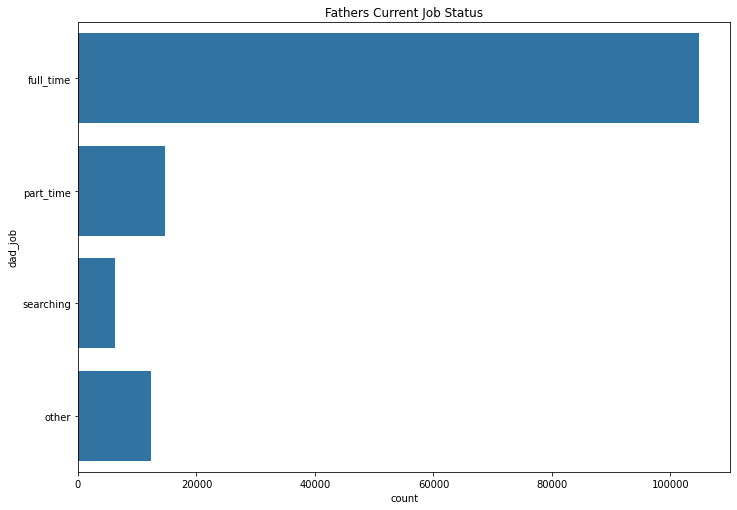

In [16]:
# Father Current Job Status
working_order = [
    'full_time',
    'part_time',
    'searching',
    'other'
]
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'dad_job', color = base_color, order = working_order);
plt.title("Fathers Current Job Status");

> The majority of fathers are working full time with very few are not working neither looking for a job.

In [17]:
df.books_count.unique()

array(['201-500', '500+', '0-10', '26-100', '11-25', '101-200'],
      dtype=object)

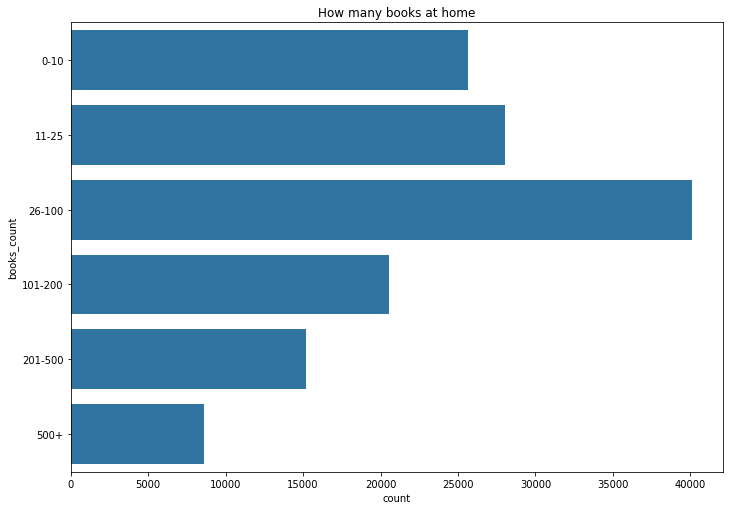

In [18]:
# How many books at home
books_order = [
    '0-10',
    '11-25',
    '26-100',
    '101-200',
    '201-500',
    '500+'
]
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'books_count', color = base_color, order = books_order);
plt.title("How many books at home");

> Most students have between 26 to 100 books at home

In [19]:
df.talk_math.unique()

array(['Sometimes', 'Often', 'Always', 'Never'], dtype=object)

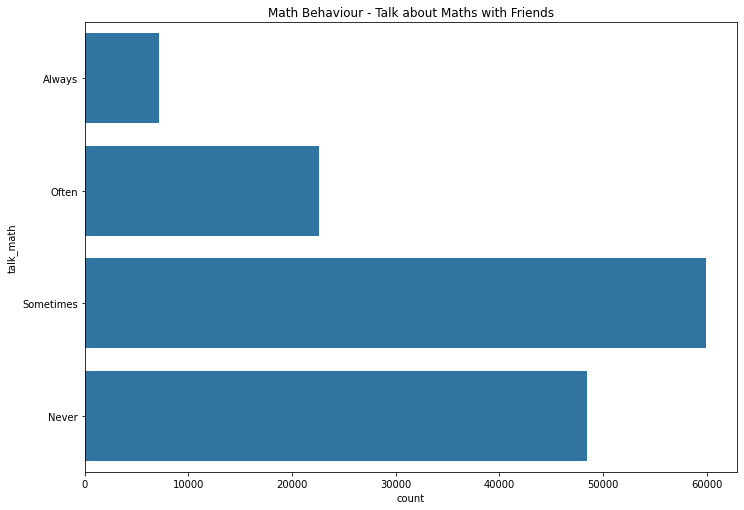

In [20]:
# How many students Talk about Maths with Friends
talks_order = [
    'Always',
    'Often',
    'Sometimes',
    'Never'
]
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'talk_math', color = base_color, order = talks_order);
plt.title("Math Behaviour - Talk about Maths with Friends");

> Most students either talks about maths with their friends sometimes or rarly.

In [21]:
df.enjoy_math.unique()

array(['Disagree', 'Agree', 'Strongly disagree', 'Strongly agree'],
      dtype=object)

# Do students enjoy Maths?
As per our study, we found that most students don't enjoy mathematics.

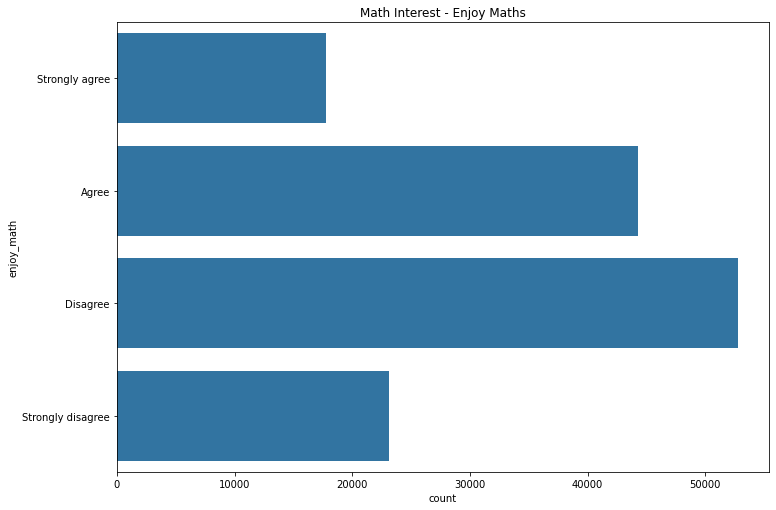

In [22]:
# How many students enjoy maths
enjoy_order = [
    'Strongly agree',
    'Agree',
    'Disagree',
    'Strongly disagree'
]
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'enjoy_math', color = base_color, order = enjoy_order);
plt.title("Math Interest - Enjoy Maths");

> The majority of students don't enjoy math!

# Do parents like Mathematics?
Unlike students, most parents agreed that they do like Mathematics.

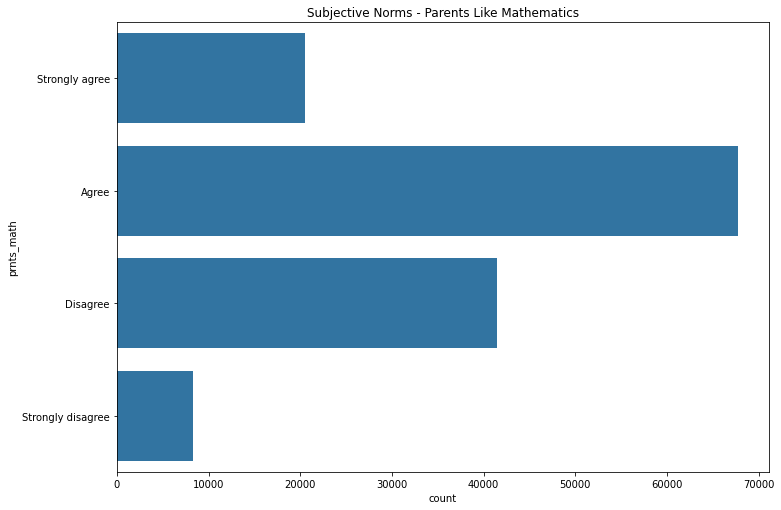

In [23]:
# How many parents like maths
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, y = 'prnts_math', color = base_color, order = enjoy_order);
plt.title("Subjective Norms - Parents Like Mathematics");

> The majority of parents like maths!

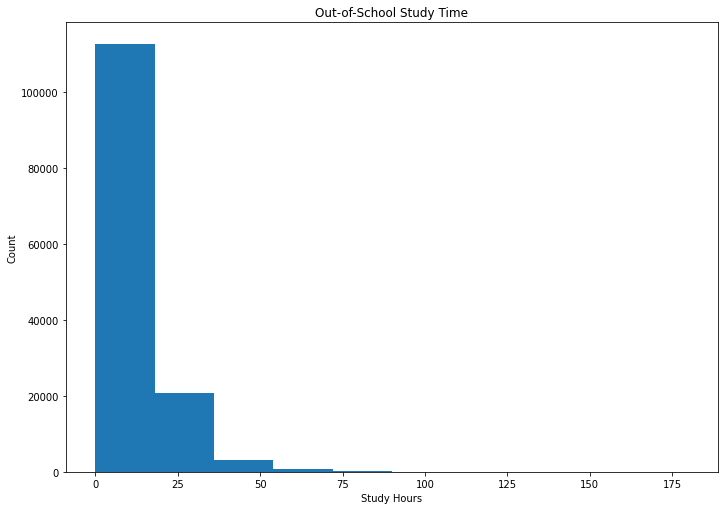

In [24]:
# Study hours
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df, x = 'stdy_hrs');
plt.title("Out-of-School Study Time");
plt.xlabel("Study Hours");
plt.ylabel("Count");

> The distribution of study hours are right skewed, so we need to use log transformation

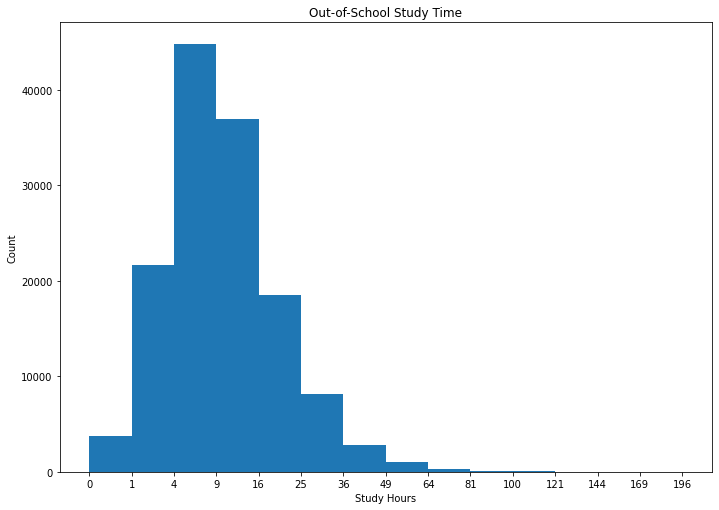

In [25]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(df['stdy_hrs'].max())+1, 1)

plt.figure(figsize=[ 11.69, 8.27])

# Plot the scaled data
plt.hist(df['stdy_hrs'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(df['stdy_hrs'].max())+1, 1)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));
plt.title("Out-of-School Study Time");
plt.xlabel("Study Hours");
plt.ylabel("Count");

> Most students spend between 4 to 9 hours studing out of school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of 'stdy_hrs' variable was highly skewed to the right, so I had to do custom transformation to zoom in the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gender       138030 non-null  object 
 1   mom_job      138030 non-null  object 
 2   dad_job      138030 non-null  object 
 3   books_count  138030 non-null  object 
 4   enjoy_math   138030 non-null  object 
 5   prnts_math   138030 non-null  object 
 6   talk_math    138030 non-null  object 
 7   stdy_hrs     138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


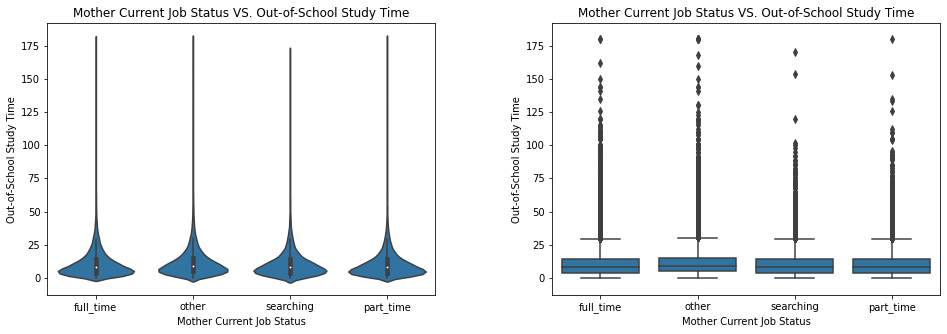

In [27]:
# # Step 3. Convert the "mom_job" column from a plain object type into an ordered categorical type 
# vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=working_order);

# # Use pandas.astype() to convert the "mom_job" column from a plain object type into an ordered categorical type 
# df['mom_job'] = df['mom_job'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5]);

# LEFT plot: violin plot
plt.subplot(1, 2, 1);
ax1 = sb.violinplot(data=df, x='mom_job', y='stdy_hrs', color=base_color, innner='quartile');
plt.title("Mother Current Job Status VS. Out-of-School Study Time");
plt.xlabel("Mother Current Job Status");
plt.ylabel("Out-of-School Study Time");

# RIGHT plot: box plot
plt.subplot(1, 2, 2);
sb.boxplot(data=df, x='mom_job', y='stdy_hrs', color=base_color);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.title("Mother Current Job Status VS. Out-of-School Study Time");
plt.xlabel("Mother Current Job Status");
plt.ylabel("Out-of-School Study Time");

plt.subplots_adjust(hspace=0.3, wspace=0.3)


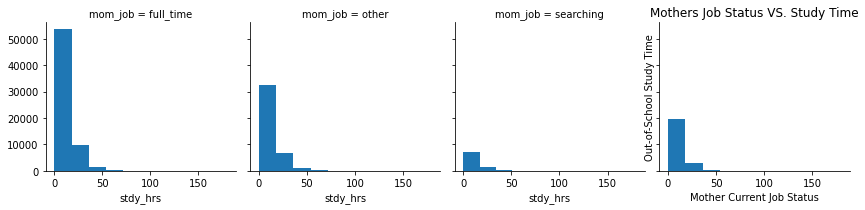

In [28]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'mom_job', col_wrap=4);
g.map(plt.hist, "stdy_hrs");
plt.title("Mothers Job Status VS. Study Time");
plt.xlabel("Mother Current Job Status");
plt.ylabel("Out-of-School Study Time");

> Interestingly, students study hours when mother is working are higher than when mother is not working!

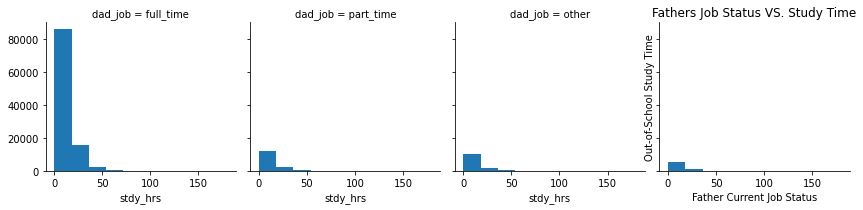

In [29]:
# Plot the Seaborn's FacetGrid
# I couldn't get them all 4 side by side; as their titles tend to overlap
g = sb.FacetGrid(data = df, col = 'dad_job', col_wrap=4);
g.map(plt.hist, "stdy_hrs");
plt.title("Fathers Job Status VS. Study Time");
plt.xlabel("Father Current Job Status");
plt.ylabel("Out-of-School Study Time");

> Study hours tend to decrease when father employment's status goes through:  
working full time > part time > other > looking for job

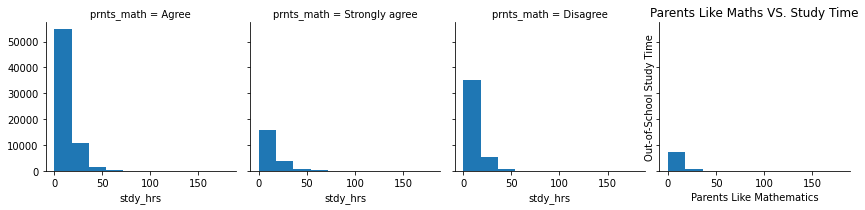

In [30]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'prnts_math', col_wrap=4);
g.map(plt.hist, "stdy_hrs");
plt.xlabel("Parents Like Mathematics");
plt.ylabel("Out-of-School Study Time");
plt.title("Parents Like Maths VS. Study Time");

> Parents who like maths, their children study hours are more than the others.

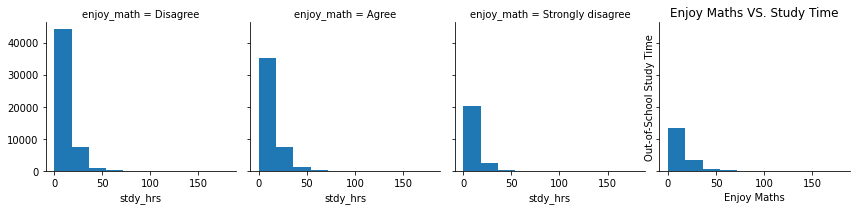

In [31]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'enjoy_math', col_wrap=4);
g.map(plt.hist, "stdy_hrs");
plt.xlabel("Enjoy Maths");
plt.ylabel("Out-of-School Study Time");
plt.title("Enjoy Maths VS. Study Time");

> Students who doesn't enjoy math are studying more at home than other students who enjoy math!

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gender       138030 non-null  object 
 1   mom_job      138030 non-null  object 
 2   dad_job      138030 non-null  object 
 3   books_count  138030 non-null  object 
 4   enjoy_math   138030 non-null  object 
 5   prnts_math   138030 non-null  object 
 6   talk_math    138030 non-null  object 
 7   stdy_hrs     138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


# Do parents who like Maths influence their children?
I found that when parents like Maths, most students tend to enjoy Maths. Also, when parents don't like Maths, most students don't enjoy maths.

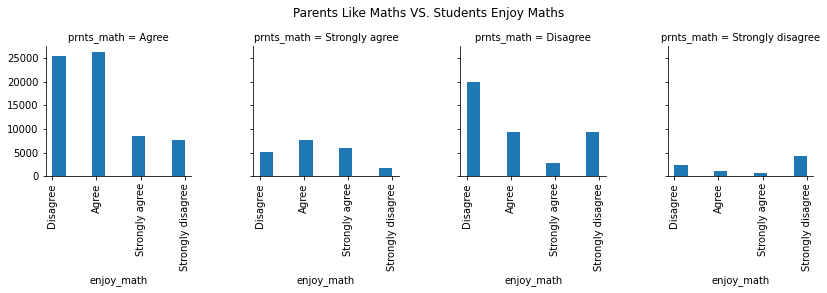

In [33]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'prnts_math', col_wrap=4);
g.map(plt.hist, "enjoy_math");
g.fig.suptitle("Parents Like Maths VS. Students Enjoy Maths");
g.fig.subplots_adjust(top=0.8);
g.set_xticklabels(rotation=90);

> WOW!
> * Parents who agree to like maths, their children agree to enjoy maths
> * Parents who disagree to like maths, their children disagree to enjoy maths
> * Parents who strongly agree to like maths, their children strongly agree to enjoy maths
> * Parents who strongly disagree to like maths, their children strongly disagree to enjoy maths

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Students who doesn't enjoy math are studying more at home than other students who enjoy math!
> * Parents who like maths, their children study hours are more than the others.
> * Study hours tend to decrease when father employment's status goes through:
working full time > part time > other > looking for job
> * students study hours when mother is working are higher than when mother is not working!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Parents who agree to like maths, their children agree to enjoy maths
> * Parents who disagree to like maths, their children disagree to enjoy maths
> * Parents who strongly agree to like maths, their children strongly agree to enjoy maths
> * Parents who strongly disagree to like maths, their children strongly disagree to enjoy maths

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gender       138030 non-null  object 
 1   mom_job      138030 non-null  object 
 2   dad_job      138030 non-null  object 
 3   books_count  138030 non-null  object 
 4   enjoy_math   138030 non-null  object 
 5   prnts_math   138030 non-null  object 
 6   talk_math    138030 non-null  object 
 7   stdy_hrs     138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


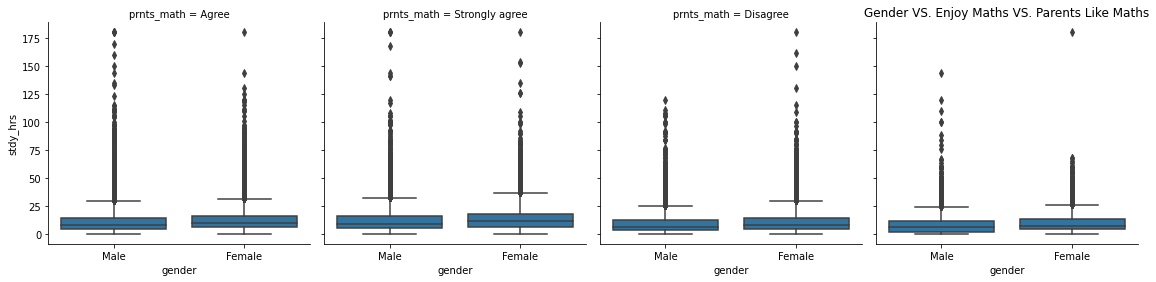

In [35]:
g = sb.FacetGrid(data = df, col = 'prnts_math', height = 4);
g.map(sb.boxplot, 'gender', 'stdy_hrs', order = ['Male', 'Female']);
plt.title("Gender VS. Enjoy Maths VS. Parents Like Maths");

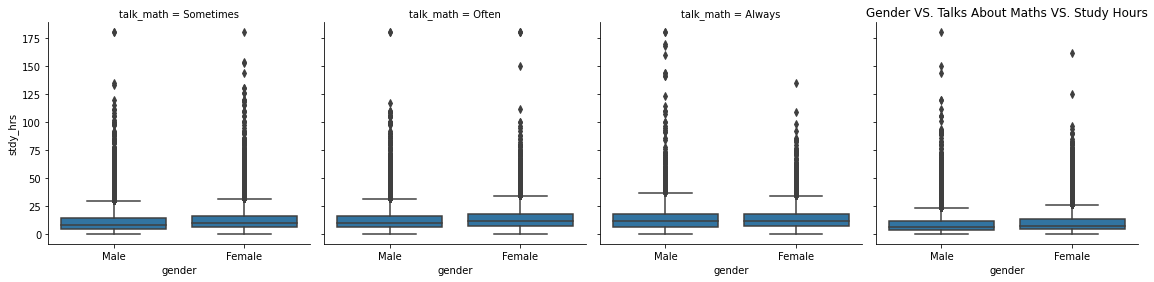

In [36]:
g = sb.FacetGrid(data = df, col = 'talk_math', height = 4);
g.map(sb.boxplot, 'gender', 'stdy_hrs', order=["Male", "Female"]);
plt.title("Gender VS. Talks About Maths VS. Study Hours");

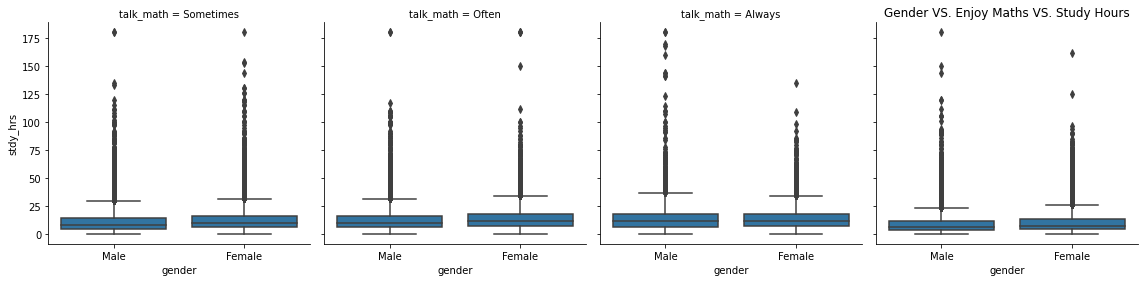

In [37]:
g = sb.FacetGrid(data = df, col = 'talk_math', height = 4);
g.map(sb.boxplot, 'gender', 'stdy_hrs', order=["Male", "Female"]);
plt.title("Gender VS. Enjoy Maths VS. Study Hours");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I cannot really observe a relationship in the multivariate exploration.

### Were there any interesting or surprising interactions between features?

> No, I cannot observe any.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!